# **A CNN model to do mulitclass classification on the "cifar10" dataset.**

In [28]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [29]:
print('Train', x_train.shape, y_train.shape)
print('Test', x_test.shape, y_test.shape)

Train (50000, 32, 32, 3) (50000, 1)
Test (10000, 32, 32, 3) (10000, 1)


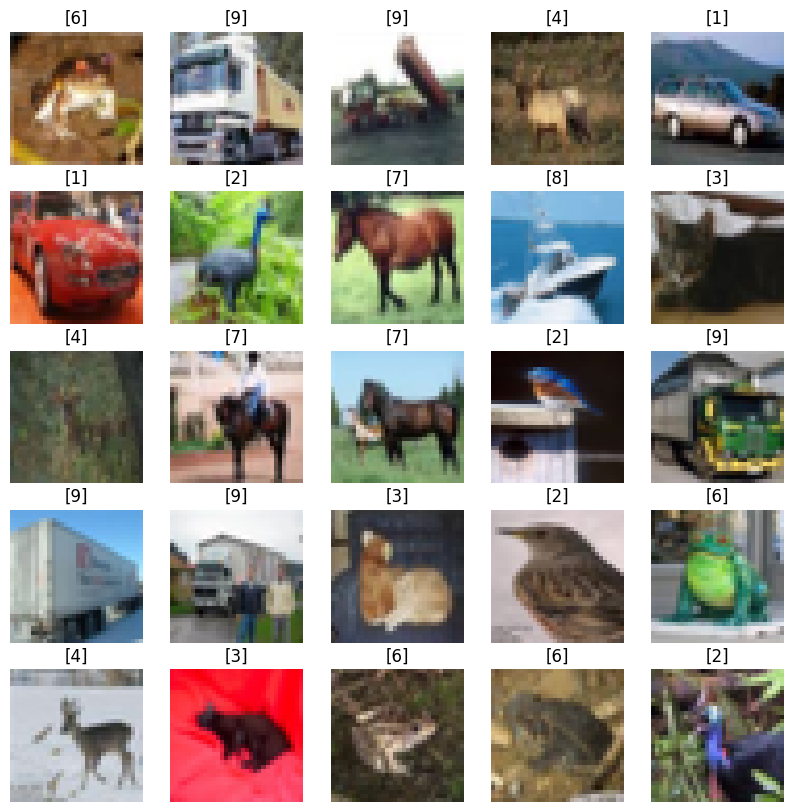

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='Greys_r')
    plt.title(y_train[i])
    plt.axis('off')

plt.show()

**One-Hot encode the data labels**

In [31]:
import keras

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

**Min-max scaling**

In [32]:
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

**CNN Architecture**

In [33]:
Conv2D?

In [34]:
Sequential.compile?

In [35]:
from warnings import filters
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.models import Sequential

def model_builder():
  # Specify the model
  model = Sequential()

  # Block 1: Conv layer with pooling
  model.add(
      Conv2D(
          filters=64,
          kernel_size=(3, 3),
          padding='SAME',
          activation='relu',
          input_shape=(32, 32, 3)
      )
  )
  model.add(
      MaxPool2D(
          pool_size=(2, 2)
      )
  )

  # Block 2: Another Conv layer with pooling
  model.add(
      Conv2D(
          filters=128,
          kernel_size=(3, 3),
          activation='relu'
      )
  )

  model.add(
      MaxPooling2D(
          pool_size=(2, 2)
      )
  )
  model.add(
      Dropout(
          rate=0.25               # Drop 25% of activation to prevent overfitting
      )
  )

  # Block 3: Another Conv layer with pooling
  model.add(
      Conv2D(
          filters=256,
          kernel_size=(3, 3),
          activation='relu'
      )
  )

  model.add(
      MaxPooling2D(
          pool_size=(2, 2)
      )
  )
  model.add(
      Dropout(
          rate=0.25               # Drop 25% of activation to prevent overfitting
      )
  )

  # Flatten the feature maps for Dense layer
  model.add(Flatten())

  # FC layers (Dense)
  model.add(
      Dense(
          units=256,
          activation='relu',
          kernel_initializer='he_uniform'
      )
  )

  model.add(
      Dense(
          units=64,
          activation='relu',
          kernel_initializer='he_uniform'
      )
  )

  model.add(
      Dense(
          units=10,
          activation='softmax',
      )
  )

  # Print the model summary
  model.summary()

  # Compile the model
  model.compile(
      optimizer='Adam',
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )

  return model


model = model_builder()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 5, 5, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 650,314 (2.48 MB)

 Trainable params: 650,314 (2.48 MB)

 Non-trainable params: 0 (0.00 B)

# **Training**

In [36]:
Sequential.fit?

In [37]:
import tensorflow as tf

# Hyperparameters
NUM_EPOCHS= 20 # Total passes over the entire training dataset.
BATCH_SIZE = 32 # how many samples you feed through the network before you
                # compute and apply one gradient update.
VALID_SPLIT = 0.2
PATIENCE = 5

callbacks = [
    # Stops training when 'val_accuracy' has not improved for 'PATIENCE' epochs
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=PATIENCE,
        restore_best_weights=True  # After stopping, restore model weights from best epoch
    ),
    # Saves the model after every epoch if 'val_accuracy' improves
    tf.keras.callbacks.ModelCheckpoint(
        filepath='best_model.keras',  # Use native Keras format (.keras)
        monitor='val_accuracy',
        save_best_only=True,          # Only keep the checkpoint with highest 'val_accuracy'
    )
]

# === Model Training ===
history = model.fit(
    x=x_train,                # Training input data
    y=y_train,                # Training target labels
    epochs=NUM_EPOCHS,        # Maximum number of epochs to train
    batch_size=BATCH_SIZE,    # Number of samples per batch
    validation_split=VALID_SPLIT,  # Portion of data reserved for validation
    callbacks=callbacks,      # List of callback functions to apply during training
    verbose=2                 # Verbosity mode: 0=silent, 1=progress bar, 2=one line per epoch
)

Epoch 1/20
1250/1250 - 206s - 165ms/step - accuracy: 0.4177 - loss: 1.5765 - val_accuracy: 0.5466 - val_loss: 1.2664
Epoch 2/20
1250/1250 - 195s - 156ms/step - accuracy: 0.5695 - loss: 1.2082 - val_accuracy: 0.6172 - val_loss: 1.1059
Epoch 3/20
1250/1250 - 211s - 169ms/step - accuracy: 0.6265 - loss: 1.0572 - val_accuracy: 0.6652 - val_loss: 0.9565
Epoch 4/20
1250/1250 - 206s - 165ms/step - accuracy: 0.6664 - loss: 0.9502 - val_accuracy: 0.6906 - val_loss: 0.8878
Epoch 5/20
1250/1250 - 199s - 159ms/step - accuracy: 0.6909 - loss: 0.8805 - val_accuracy: 0.7041 - val_loss: 0.8696
Epoch 6/20
1250/1250 - 204s - 163ms/step - accuracy: 0.7139 - loss: 0.8148 - val_accuracy: 0.7125 - val_loss: 0.8258
Epoch 7/20
1250/1250 - 198s - 158ms/step - accuracy: 0.7285 - loss: 0.7705 - val_accuracy: 0.7275 - val_loss: 0.7889
Epoch 8/20
1250/1250 - 197s - 157ms/step - accuracy: 0.7435 - loss: 0.7298 - val_accuracy: 0.7346 - val_loss: 0.7649
Epoch 9/20
1250/1250 - 212s - 170ms/step - accuracy: 0.7570 - lo

In [38]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {acc * 100:.2f}%")

Test accuracy: 74.45%


And that means that there is overfitting, I'll fix it later on.